# Assignment #5.
I pledge on my honor that I have not given or received any unauthorized assistance on this assignment/examination. I further pledge that I have not copied any material from a book, article, the Internet or any other source except where I have expressly cited the source.

By filling out the following fields, you are signing this pledge. No assignment will get credit without being pledged.

Name:Priestley Fernandes

CWID:20008622

Date:12/2/2022

# Instructions
In this assignment, you should use this Jupyter notebook to answer the questions below. Simply type your code into embedded chunks.

For all the programming homeworks, you should submit a report as a Jupyter notebook organized by questions, with the proper explanation for every answer, and saved as 1). an HTML or pdf file. It might be easier to generate an HTML file than a pdf file. 2). Notebook file with the extension .ipynb. From the file menu of the Jupyter notebook, you can download the PDF or HTML and ipynb files as: File --> Download as:

If you want to improve your homework, you can resubmit it until the deadline.

1 point for every item of every question. Total = 20 (with an optional extra question, although the maximum grade is 20)

Pilgrim Bank.

This exercise is based on the case Pilgrim Bank A (602104), Harvard Business School. In order to buy this case, you must register in the HBS website following this link:
https://hbsp.harvard.edu/import/1001998

You must read the case to understand the main problem proposed that would help you to answer the questions in the proper way.

Using the dataset from the Pilgrim Bank case, please answer the following questions to evaluate the impact of the online channel and if its adoption requires pay a rebate or receive a fee from the customers.
The dataset uses the following convention: variables 9xxx and 0xxx refer to 1999 and 2000 respectively. Observations of 2000 with missing observations are from customers that have already left the bank.

You can answer most of the questions until 5.c. using linear regression (OLS). The program should be written in Python.

1. Calculate average customer profitability for 1999 and 2000 with 95% confidence level


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import scipy.stats as st

#Importing the data file 
df = pd.read_excel('608715-XLS-ENG.xls',sheet_name='Data')
print(df.describe())

#Printing the number of NaN values
print(df.isna().sum())

#Finding the 95% confidence interval for mean 1999 data
confi_95_1999 = st.norm.interval(alpha=0.95, loc=np.mean(df['9Profit']), scale=st.sem(df['9Profit']))
print(confi_95_1999)

df_2000_profit = df['0Profit'].dropna()

#Finding the 95% confidence interval for mean 1999 data
confi_95_2000 = st.norm.interval(alpha=0.95, loc=np.mean(df_2000_profit), scale=st.sem(df_2000_profit))
print(confi_95_2000)



## Create a normal distribution with mean as 5 and standard deviation as 10
##
#mu = 0
#std = 1
#snd = stats.norm(mu, std)
##
#
##
## Plot the standard normal distribution for different values of random variable
## falling in the range -100, 100
##
#plt.figure(figsize=(7.5,7.5))
#plt.plot(df['9Profit'].values, snd.pdf(df['9Profit'].values))
##plt.xlim(-60, 60)
#plt.title('Normal Distribution (Mean = 0, STD = 1)', fontsize='15')
#plt.xlabel('Values of Random Variable X', fontsize='15')
#plt.ylabel('Probability', fontsize='15')
#plt.show()

                 ID       9Profit       9Online          9Age          9Inc  \
count  31634.000000  31634.000000  31634.000000  23345.000000  23373.000000   
mean   15817.500000    111.502687      0.121831      4.046048      5.458777   
std     9132.093544    272.839391      0.327096      1.642316      2.346881   
min        1.000000   -221.000000      0.000000      1.000000      1.000000   
25%     7909.250000    -34.000000      0.000000      3.000000      4.000000   
50%    15817.500000      9.000000      0.000000      4.000000      6.000000   
75%    23725.750000    164.000000      0.000000      5.000000      7.000000   
max    31634.000000   2071.000000      1.000000      7.000000      9.000000   

            9Tenure     9District       0Profit       0Online      9Billpay  \
count  31634.000000  31634.000000  26396.000000  26415.000000  31634.000000   
mean      10.162690   1203.186445    144.827019      0.198978      0.016691   
std        8.453867     47.906512    389.994724    

In [2]:
df

,ID,9Profit,9Online,9Age,9Inc,9Tenure,9District,0Profit,0Online,9Billpay,0Billpay
0,1,21,0,NaN,NaN,6.33,1200,NaN,NaN,0,NaN
1,2,-6,0,6.0,3.0,29.50,1200,-32.0,0.0,0,0.0
2,3,-49,1,5.0,5.0,26.41,1100,-22.0,1.0,0,0.0
3,4,-4,0,NaN,NaN,2.25,1200,NaN,NaN,0,NaN
4,5,-61,0,2.0,9.0,9.91,1200,-4.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
31629,31630,-50,0,5.0,5.0,3.75,1200,1.0,0.0,0,0.0
31630,31631,458,0,3.0,8.0,12.08,1300,423.0,1.0,0,0.0
31631,31632,-83,0,6.0,4.0,15.83,1200,-60.0,0.0,0,0.0
31632,31633,92,1,1.0,6.0,5.41,1200,170.0,1.0,0,0.0


2.a. Evaluate if online channel has a significant impact on 1999 profitability (9Profit).

In [9]:
#Point biserial Correlation
#Checking correlation between profitability and online status
import statsmodels.api as sm
from scipy import stats

df_new = df.rename(columns={'9Profit':'NineProfit','9Online':'NineOnline','9Age':'NineAge'})
print('The correaltion results are as follwows: ')
print(stats.pointbiserialr(df['9Profit'],df['9Online']))
print(stats.pearsonr(df['9Online'], df['9Profit']))


#Using OLS to find the relationship between variables
lm = sm.OLS.from_formula('NineProfit ~ NineOnline', df_new)
result = lm.fit()
result.summary()

The correaltion results are as follwows: 
PointbiserialrResult(correlation=0.007049991595090047, pvalue=0.209887814832458)
(0.007049991595090047, 0.209887814832458)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NineProfit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.572
Date:                Mon, 05 Dec 2022   Prob (F-statistic):              0.210
Time:                        10:53:16   Log-Likelihood:            -2.2232e+05
No. Observations:               31634   AIC:                         4.446e+05
Df Residuals:                   31632   BIC:                         4.447e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    110.7862      1.637     67.678      0.000     107.578     113.995
NineOnline     5.8806      4.690      1.254      0.210      -3.312      15.073
==============================================================================
Omnibus:                    18552.376   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169948.260
Skew:                           2.747   Prob(JB):                         0.00
Kurtosis:                      12.937   Cond. No.                         3.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The relationship with profitabilty in 1999 and online channel status


2.b. Does age help to explain if online channel has a significant impact on 1999 profitability?

In [204]:
#Using OLS to find the relationship between variables with Age added

print(sum(df_new['NineAge'].isna()))
lm = sm.OLS.from_formula('NineProfit ~ NineOnline + NineAge', df_new)
result = lm.fit()
result.summary()

8289


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NineProfit   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     264.9
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          1.67e-114
Time:                        14:52:16   Log-Likelihood:            -1.6452e+05
No. Observations:               23345   AIC:                         3.291e+05
Df Residuals:                   23342   BIC:                         3.291e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0804      5.059      3.376      0.001       7.165      26.996
NineOnline    27.1882      5.523      4.923      0.000      16.363      38.013
NineAge       25.8570      1.125     22.992      0.000      23.653      28.061
==============================================================================
Omnibus:                    12446.568   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94787.476
Skew:                           2.494   Prob(JB):                         0.00
Kurtosis:                      11.518   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#Other approach
df_new_new = df.dropna(subset=['9Age'])

x = df_new_new[['9Online','9Age']]
y = df_new_new['9Profit']
 
print(sum(df['9Age'].isna()))
x = sm.add_constant(x)
#
lm = sm.OLS(y,x)
result = lm.fit()
result.summary()

8289


/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                9Profit   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     264.9
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          1.67e-114
Time:                        10:56:52   Log-Likelihood:            -1.6452e+05
No. Observations:               23345   AIC:                         3.291e+05
Df Residuals:                   23342   BIC:                         3.291e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0804      5.059      3.376      0.001       7.165      26.996
9Online       27.1882      5.523      4.923      0.000      16.363      38.013
9Age          25.8570      1.125     22.992      0.000      23.653      28.061
==============================================================================
Omnibus:                    12446.568   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94787.476
Skew:                           2.494   Prob(JB):                         0.00
Kurtosis:                      11.518   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The relationship  profitabilty in 1999 and online channel status with age added


3. To adjust for missing observations in the case of the variables 9Age and 9Inc (income) and adjust other variables: 
	- Substitute missing observations with zeros: create variables 0Age and 0Inc 
	- Substitute missing observations with averages: create variables AgeAvg and IncAvg
	- Include additional dummy variables where 1 if there is data and 0 otherwise: create variables AgeExist and IncExist (define as factor variable).
	- Retain takes a value of 0 when Profit0 has a missing observation and 1 otherwise: create variable retainD.
	- Create dummy variables D1100 and D1200 for districts 1100 and 1200 respectively from the variable District9.

In [12]:
#Adjustment for missing values
import math

#Substitute missing observations with zeros
df['0Age']= df['9Age'].replace(np.nan,0)
df['0Inc']= df['9Inc'].replace(np.nan,0)

#Substitute missing observations with averages
df['AgeAvg']= df['9Age'].replace(np.nan,np.mean(df['9Age']))
df['IncAvg']= df['9Inc'].replace(np.nan,np.mean(df['9Age']))

#Include additional dummy variables where 1 if there is data and 0 otherwise
df['AgeExist']= df['9Age'].apply(lambda x: 0 if math.isnan(x) else 1)
df['IncExist']= df['9Inc'].apply(lambda x: 0 if math.isnan(x) else 1)

#Retain takes a value of 0 when Profit0 has a missing observation and 1 otherwise
df['retainD'] = df['0Profit'].apply(lambda x: 0 if math.isnan(x) else 1)

#Creation of dummy variables D1100 and D1200 for districts 1100 and 1200 respectively from the variable District9.
df['DummyDistrict'] = df['9District'].replace({1100:'D1100',1200:'D1200'})


#Checking the values
print(math.nan)
print(df['0Age'])
print(df['9Age'])
print(df['0Age'][0])

print(df['0Age'])
print(df['9Age'])

print(df['AgeAvg'])
print(df['IncAvg'])

print(df['AgeExist'])
print(df['IncExist'])

print(df['0Profit'])
print(df['retainD'])

#df['XP'] = df.Close.apply(lambda x: 0 if x<=per_15 else 2 if x>= per_85 else 1

print(df['9District'])
print(df['DummyDistrict'])

nan
0        0.0
1        6.0
2        5.0
3        0.0
4        2.0
        ... 
31629    5.0
31630    3.0
31631    6.0
31632    1.0
31633    3.0
Name: 0Age, Length: 31634, dtype: float64
0        NaN
1        6.0
2        5.0
3        NaN
4        2.0
        ... 
31629    5.0
31630    3.0
31631    6.0
31632    1.0
31633    3.0
Name: 9Age, Length: 31634, dtype: float64
0.0
0        0.0
1        6.0
2        5.0
3        0.0
4        2.0
        ... 
31629    5.0
31630    3.0
31631    6.0
31632    1.0
31633    3.0
Name: 0Age, Length: 31634, dtype: float64
0        NaN
1        6.0
2        5.0
3        NaN
4        2.0
        ... 
31629    5.0
31630    3.0
31631    6.0
31632    1.0
31633    3.0
Name: 9Age, Length: 31634, dtype: float64
0        4.046048
1        6.000000
2        5.000000
3        4.046048
4        2.000000
           ...   
31629    5.000000
31630    3.000000
31631    6.000000
31632    1.000000
31633    3.000000
Name: AgeAvg, Length: 31634, dtype: float64
0        4

To test for bias of missing data, evaluate if missing data has an effect on profitability analysis:  
3a. Evaluate the effect of online channel on 1999 profits when Age0 is included.  

In [13]:
#Evaluation of effect of 0Age on profitability for online channel status
x = df[['9Online','0Age']]
y = df['9Profit']
 
x = sm.add_constant(x)

lm = sm.OLS(y,x)
result = lm.fit()
result.summary()


/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                9Profit   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     349.3
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          8.59e-151
Time:                        11:05:38   Log-Likelihood:            -2.2197e+05
No. Observations:               31634   AIC:                         4.440e+05
Df Residuals:                   31631   BIC:                         4.440e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.0311      2.601     21.923      0.000      51.932      62.130
9Online       13.7925      4.649      2.967      0.003       4.681      22.904
0Age          17.6803      0.670     26.402      0.000      16.368      18.993
==============================================================================
Omnibus:                    18491.577   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173288.169
Skew:                           2.724   Prob(JB):                         0.00
Kurtosis:                      13.089   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The relationship between profitabilty in 1999 and online channel status considering Age0

3b. Evaluate if adjusting missing data using 0Age or AgeAvg is relevant. In both cases, it is still necessary to include the additional variable  AgeExist to control for the missing data.  

In [352]:
#Evaluation of effect of 0Age on profitability for online channel status
x = df[['9Online','0Age']]
y = df['9Profit']
 
x = sm.add_constant(x)

lm = sm.OLS(y,x)
result = lm.fit()
result.summary()

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                9Profit   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     349.3
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          8.59e-151
Time:                        19:51:53   Log-Likelihood:            -2.2197e+05
No. Observations:               31634   AIC:                         4.440e+05
Df Residuals:                   31631   BIC:                         4.440e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.0311      2.601     21.923      0.000      51.932      62.130
9Online       13.7925      4.649      2.967      0.003       4.681      22.904
0Age          17.6803      0.670     26.402      0.000      16.368      18.993
==============================================================================
Omnibus:                    18491.577   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173288.169
Skew:                           2.724   Prob(JB):                         0.00
Kurtosis:                      13.089   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Evaluation of effect of AgeAvg on profitability for online channel status
x = df[['9Online','AgeAvg']]
y = df['9Profit']
 
x = sm.add_constant(x)

lm = sm.OLS(y,x)
result = lm.fit()
result.summary()

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                9Profit   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     278.6
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          1.13e-120
Time:                        11:09:04   Log-Likelihood:            -2.2204e+05
No. Observations:               31634   AIC:                         4.441e+05
Df Residuals:                   31631   BIC:                         4.441e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9111      4.776      1.028      0.304      -4.450      14.272
9Online       22.0049      4.699      4.683      0.000      12.794      31.216
AgeAvg        25.6820      1.090     23.572      0.000      23.547      27.818
==============================================================================
Omnibus:                    18373.229   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168373.856
Skew:                           2.711   Prob(JB):                         0.00
Kurtosis:                      12.917   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Evaluation of effect of 0Avg along with AgeExist on profitability for online channel status 
x = df[['9Online','0Age','AgeExist']]
y = df['9Profit']
 
x = sm.add_constant(x)

lm = sm.OLS(y,x)
result = lm.fit()
result.summary()

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                9Profit   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     262.1
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          4.76e-168
Time:                        11:10:17   Log-Likelihood:            -2.2193e+05
No. Observations:               31634   AIC:                         4.439e+05
Df Residuals:                   31630   BIC:                         4.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.9263      3.000     23.643      0.000      65.046      76.806
9Online       19.6488      4.685      4.194      0.000      10.465      28.832
0Age          25.6025      1.086     23.582      0.000      23.475      27.731
AgeExist     -51.8491      5.598     -9.263      0.000     -62.821     -40.878
==============================================================================
Omnibus:                    18423.124   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171802.517
Skew:                           2.713   Prob(JB):                         0.00
Kurtosis:                      13.045   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#Evaluation of effect of AgeAvg along with AgeExist on profitability for online channel status 
x = df[['9Online','AgeAvg','AgeExist']]
y = df['9Profit']
 
x = sm.add_constant(x)

lm = sm.OLS(y,x)
result = lm.fit()
result.summary()

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                9Profit   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     262.1
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          4.76e-168
Time:                        11:10:19   Log-Likelihood:            -2.2193e+05
No. Observations:               31634   AIC:                         4.439e+05
Df Residuals:                   31630   BIC:                         4.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.6628      5.377     -6.074      0.000     -43.203     -22.123
9Online       19.6488      4.685      4.194      0.000      10.465      28.832
AgeAvg        25.6025      1.086     23.582      0.000      23.475      27.731
AgeExist      51.7399      3.448     15.006      0.000      44.982      58.498
==============================================================================
Omnibus:                    18423.124   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171802.517
Skew:                           2.713   Prob(JB):                         0.00
Kurtosis:                      13.045   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The relationship between profitabilty in 1999 and online channel status considering Age0/AvgAge and AgeExist

3c. Repeat above steps with income. Evaluate if adjusting missing data using 0Inc or IncAvg is relevant. Include AgeExist and AgeAvg in the calculations.

In [17]:
#Evaluation by adding 0Inc
x = df[['9Online','AgeAvg','AgeExist','0Inc']]
y = df['9Profit']
 
print(sum(df['9Age'].isna()))
x = sm.add_constant(x)
#
lm = sm.OLS(y,x)
result = lm.fit()
result.summary()

8289


/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                9Profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     348.1
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          9.39e-294
Time:                        11:12:40   Log-Likelihood:            -2.2164e+05
No. Observations:               31634   AIC:                         4.433e+05
Df Residuals:                   31629   BIC:                         4.433e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.6429      5.336     -7.430      0.000     -50.101     -29.185
9Online       11.9216      4.653      2.562      0.010       2.801      21.042
AgeAvg        26.3375      1.076     24.474      0.000      24.228      28.447
AgeExist     -32.5202      4.866     -6.683      0.000     -42.058     -22.982
0Inc          16.6439      0.685     24.314      0.000      15.302      17.986
==============================================================================
Omnibus:                    18276.154   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           170437.505
Skew:                           2.683   Prob(JB):                         0.00
Kurtosis:                      13.025   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Evaluation by adding 0Inc
x = df[['9Online','AgeAvg','AgeExist','IncAvg']]
y = df['9Profit']
 
print(sum(df['9Age'].isna()))
x = sm.add_constant(x)
#
lm = sm.OLS(y,x)
result = lm.fit()
result.summary()

8289


/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                9Profit   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     360.3
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          5.83e-304
Time:                        11:12:55   Log-Likelihood:            -2.2161e+05
No. Observations:               31634   AIC:                         4.432e+05
Df Residuals:                   31629   BIC:                         4.433e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -114.0516      6.222    -18.331      0.000    -126.246    -101.857
9Online       12.0142      4.649      2.584      0.010       2.903      21.126
AgeAvg        26.9874      1.076     25.074      0.000      24.878      29.097
AgeExist      25.6400      3.566      7.189      0.000      18.650      32.630
IncAvg        18.8564      0.746     25.282      0.000      17.395      20.318
==============================================================================
Omnibus:                    18258.790   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           170145.331
Skew:                           2.680   Prob(JB):                         0.00
Kurtosis:                      13.018   Cond. No.                         29.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4.a. Evaluate if online channel has a significant impact on 1999 profitability after controlling for demographic variables: age, income, tenure, and geographic district. You can evaluate the impact of geographic district using the dummy variables D1100 and D1200.



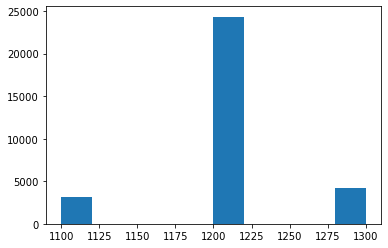

8289


/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                9Profit   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     313.8
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:16:16   Log-Likelihood:            -1.9245e+05
No. Observations:               27484   AIC:                         3.849e+05
Df Residuals:                   27477   BIC:                         3.850e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -351.5052     60.907     -5.771      0.000    -470.886    -232.124
9Online       16.2287      4.904      3.309      0.001       6.617      25.840
AgeAvg        16.3280      1.244     13.121      0.000      13.889      18.767
AgeExist      14.1750      3.883      3.650      0.000       6.564      21.786
IncAvg        17.0476      0.810     21.058      0.000      15.461      18.634
9Tenure        5.0205      0.210     23.888      0.000       4.609       5.432
9District      0.2087      0.051      4.070      0.000       0.108       0.309
==============================================================================
Omnibus:                    15503.654   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           141109.203
Skew:                           2.607   Prob(JB):                         0.00
Kurtosis:                      12.799   Cond. No.                     4.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#Evaluation using dummy variables

plt.hist(df['9District'])
plt.show()

#Using the geographic district as mentioned as D1100 and D1200
df_1 = df[df['9Online']==0]
df_new_new = df[(df['DummyDistrict'] == 'D1100') | (df['DummyDistrict'] == 'D1200')]

#Evaluation using demograohic variables like age, income, tenure, and geographic district
x = df_new_new[['9Online','AgeAvg','AgeExist','IncAvg','9Tenure','9District']]
y = df_new_new['9Profit']
 
print(sum(df['9Age'].isna()))
x = sm.add_constant(x)
#
lm = sm.OLS(y,x)
result = lm.fit()
result.summary()
#df_new_new

5.a. Evaluate the drivers of customer profitability for the year 2000 (Hint: you can evaluate the variables explored for profitability of 1999).
<!-- Note: for NN, you can use the neuralnet or the keras package. Both require that factor variables are transformed into dummy variables when they are used as dependent variables. I suggest that you use the neuralnet package as it is much simpler to manage;

If you want to use the keras package, it is well explained in the lab 10.9 of ISLR, and it is especially useful for deep learning. Instructions to install the keras package: https://web.stanford.edu/~hastie/ISLR2/keras-instructions.html
 -->

In [20]:
#Evaluation for profitability for the year 2000 using all explored variable till now

#Removing the NaN values for 0Profit 
df_2000 = df.dropna(subset = ['0Profit'])
print(df_2000.shape[0])


x = df_2000[['AgeAvg','AgeExist','IncAvg','9Tenure','9District']]
y = df_2000['0Profit']
 
#print(sum(df['9Age'].isna()))
x = sm.add_constant(x)
#
lm = sm.OLS(y,x)
result = lm.fit()
result.summary()


26396


/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                0Profit   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     181.5
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          1.16e-190
Time:                        11:20:52   Log-Likelihood:            -1.9449e+05
No. Observations:               26396   AIC:                         3.890e+05
Df Residuals:                   26390   BIC:                         3.890e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -128.6332     60.687     -2.120      0.034    -247.584      -9.683
AgeAvg        12.4570      1.742      7.150      0.000       9.042      15.872
AgeExist      -2.4406      6.316     -0.386      0.699     -14.821       9.940
IncAvg        22.5954      1.120     20.172      0.000      20.400      24.791
9Tenure        4.7017      0.301     15.636      0.000       4.112       5.291
9District      0.0467      0.050      0.939      0.348      -0.051       0.144
==============================================================================
Omnibus:                    56293.262   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1144514622.175
Skew:                          18.150   Prob(JB):                         0.00
Kurtosis:                    1022.464   Cond. No.                     3.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Evaluation for profitability for the year 2000 using all explored variable till now

5.b. Evaluate if the variable 9Profit should be included in the customer profitability analysis for 2000.

In [22]:
df_2000 = df.dropna(subset = ['0Profit'])
print(df_2000.shape[0])

x = df_2000[['AgeAvg','AgeExist','IncAvg','9Tenure','9District','9Profit']]
y = df_2000['0Profit']
 
#print(sum(df['9Age'].isna()))
x = sm.add_constant(x)
#
lm = sm.OLS(y,x)
result = lm.fit()
result.summary()

26396


/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                0Profit   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     2487.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:25:15   Log-Likelihood:            -1.8902e+05
No. Observations:               26396   AIC:                         3.781e+05
Df Residuals:                   26389   BIC:                         3.781e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.5589     49.339     -0.700      0.484    -131.267      62.149
AgeAvg        -1.2923      1.421     -0.909      0.363      -4.078       1.493
AgeExist      -8.5798      5.135     -1.671      0.095     -18.644       1.485
IncAvg         7.3568      0.920      7.997      0.000       5.554       9.160
9Tenure        0.9005      0.247      3.652      0.000       0.417       1.384
9District      0.0371      0.040      0.916      0.359      -0.042       0.116
9Profit        0.8258      0.007    116.392      0.000       0.812       0.840
==============================================================================
Omnibus:                    70142.963   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6083055858.968
Skew:                          31.289   Prob(JB):                         0.00
Kurtosis:                    2353.951   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

5.c. Drop any missing values on your dataset. 
Split the data in 2/3 training and 1/3 testing.  
Evaluate the most important variables to forecast profitability for 2000 using OLS with the training sample.  
Forecast customer profitability of the test sample for 2000 after adding electronic billpay and calculate the mean squared error

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split

mse_dict = {}

print(df_2000.columns)
Y= df_2000['0Profit']
X = df_2000.drop(['0Profit','9Age','9Inc','DummyDistrict'],axis = 1)


#Splitting data into training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.75,random_state = 100)


x = X_train[['AgeAvg','AgeExist','IncAvg','9Tenure','9District','9Profit']]
y = Y_train
 
##print(sum(df['9Age'].isna()))
x = sm.add_constant(x)
lm = sm.OLS(y,x)
result = lm.fit()
result.summary()





Index(['ID', '9Profit', '9Online', '9Age', '9Inc', '9Tenure', '9District',
       '0Profit', '0Online', '9Billpay', '0Billpay', '0Age', '0Inc', 'AgeAvg',
       'IncAvg', 'AgeExist', 'IncExist', 'retainD', 'DummyDistrict'],
      dtype='object')


/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                0Profit   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     1630.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:06:25   Log-Likelihood:            -1.4322e+05
No. Observations:               19797   AIC:                         2.865e+05
Df Residuals:                   19790   BIC:                         2.865e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.0674     61.404     -0.441      0.659    -147.425      93.291
AgeAvg        -1.7743      1.766     -1.004      0.315      -5.237       1.688
AgeExist     -10.4939      6.390     -1.642      0.101     -23.019       2.031
IncAvg         7.6864      1.145      6.713      0.000       5.442       9.931
9Tenure        1.1014      0.305      3.610      0.000       0.503       1.699
9District      0.0312      0.050      0.621      0.535      -0.067       0.130
9Profit        0.8175      0.009     94.023      0.000       0.800       0.835
==============================================================================
Omnibus:                    53693.100   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4490651072.797
Skew:                          33.067   Prob(JB):                         0.00
Kurtosis:                    2335.309   Cond. No.                     3.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
#Checking by adding 0Billpay
x = X_train[['AgeAvg','AgeExist','IncAvg','9Tenure','9District','9Profit','0Billpay']]
y = Y_train
 
#9Billpay
##print(sum(df['9Age'].isna()))
x = sm.add_constant(x)
##
lm = sm.OLS(y,x)
result = lm.fit()
result.summary()


/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                0Profit   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     1399.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:06:26   Log-Likelihood:            -1.4322e+05
No. Observations:               19797   AIC:                         2.865e+05
Df Residuals:                   19789   BIC:                         2.865e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.3154     61.397     -0.461      0.645    -148.660      92.029
AgeAvg        -1.5389      1.769     -0.870      0.384      -5.005       1.928
AgeExist     -10.6038      6.389     -1.660      0.097     -23.127       1.920
IncAvg         7.5678      1.146      6.605      0.000       5.322       9.814
9Tenure        1.1290      0.305      3.699      0.000       0.531       1.727
9District      0.0310      0.050      0.617      0.537      -0.068       0.130
9Profit        0.8163      0.009     93.745      0.000       0.799       0.833
0Billpay      36.8103     14.203      2.592      0.010       8.972      64.649
==============================================================================
Omnibus:                    53704.792   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4497385725.572
Skew:                          33.086   Prob(JB):                         0.00
Kurtosis:                    2337.057   Cond. No.                     3.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
#Using backward subset selection for selecting the prominent features

import itertools
#Defining function for fitting model on feature set and calculating RSS
def ProcessSubset(feature_set):
    model = sm.OLS(Y_train,X_train[list(feature_set)])
    reg = model.fit()
    RSS = ((reg.predict(X_train[list(feature_set)]) - Y_train)**2).sum()
    return {'model':reg,'RSS':RSS}

#Using Backward subset selection
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(ProcessSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model



Processed  15 models on 14 predictors in 0.19732403755187988 seconds.
Processed  14 models on 13 predictors in 0.15395784378051758 seconds.
Processed  13 models on 12 predictors in 0.10702991485595703 seconds.
Processed  12 models on 11 predictors in 0.12409710884094238 seconds.
Processed  11 models on 10 predictors in 0.11056208610534668 seconds.
Processed  10 models on 9 predictors in 0.09682726860046387 seconds.
Processed  9 models on 8 predictors in 0.07480907440185547 seconds.
Processed  8 models on 7 predictors in 0.06089282035827637 seconds.
Processed  7 models on 6 predictors in 0.0493922233581543 seconds.
Processed  6 models on 5 predictors in 0.03272700309753418 seconds.
Processed  5 models on 4 predictors in 0.019708871841430664 seconds.
Processed  4 models on 3 predictors in 0.011078119277954102 seconds.
Processed  3 models on 2 predictors in 0.008015155792236328 seconds.
Processed  2 models on 1 predictors in 0.0049970149993896484 seconds.
Total elapsed time: 1.05990624427

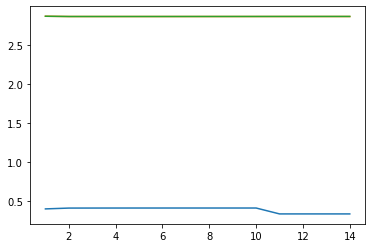

In [74]:
from sklearn.metrics import mean_squared_error
import time 
#Applying backward subset selection
df_models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X_train.columns)))

tic = time.time()

#Initiating the predictors icluding all columns
predictors = X_train.columns

#Applying backward subset selection with simultaneous removal of feature at each step
while(len(predictors) > 1):  
    df_models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = df_models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")


##Extracting R2,AIC and BIC and creating a column for R2,BIC,AIC in original table
R2 = df_models_bwd.apply(lambda row: row[1].rsquared, axis=1)
df_models_bwd['R-square'] = R2

AIC = df_models_bwd.apply(lambda row: row[1].aic, axis=1)
df_models_bwd['AIC'] = AIC

BIC = df_models_bwd.apply(lambda row: row[1].bic, axis=1)
df_models_bwd['BIC'] = BIC



print(df_models_bwd)
df_models_bwd.sort_values('R-square',ascending=False)


#Plotting the r square, AIC and BIC values 
plt.plot(df_models_bwd['R-square'])
plt.plot(df_models_bwd['AIC']/100000)
plt.plot(df_models_bwd['BIC']/100000)

#
##Getting index of the optimal model based on max R-square value
best_model_id_bwd = pd.to_numeric(df_models_bwd['R-square']).argmax()


#
##Printing the result and co-efficients 
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(df_models_bwd.loc[best_model_id_bwd +1, "model"].summary())
print(df_models_bwd.loc[best_model_id_bwd+1, "model"].params)

#Slecting the best model after analysing the data considering the significance of co-efficients 
print(df_models_bwd.loc[5, "model"].summary())
print(df_models_bwd.loc[5, "model"].params)


final_model = df_models_bwd.loc[5, "model"]
print(final_model.summary())

# Printing the co-efficients involved
params = list(df_models_bwd.loc[5, "model"].params.keys())

print('The significant features are found to be: ')
print(params)

#Based on the parameters used modifying the test set
X_test_mod = X_test[params]



#Finding the predicted values

predicted = final_model.predict(X_test_mod)

#Finding mean squared error
mse_ols = mean_squared_error(Y_test,predicted)
print('The mse is: ')
print(mse_ols)

#Adding in the dictionary 
mse_dict['OLS'] = mse_ols


In [75]:
X_train

,ID,9Profit,9Online,9Tenure,9District,0Online,9Billpay,0Billpay,0Age,0Inc,AgeAvg,IncAvg,AgeExist,IncExist,retainD
26706,26707,-146,0,5.25,1300,0.0,0,0.0,4.0,8.0,4.000000,8.000000,1,1,1
3106,3107,10,0,0.16,1200,0.0,0,0.0,0.0,0.0,4.046048,4.046048,0,0,1
7574,7575,-19,1,2.91,1200,1.0,0,0.0,3.0,9.0,3.000000,9.000000,1,1,1
9770,9771,28,0,30.75,1300,0.0,0,0.0,6.0,0.0,6.000000,4.046048,1,0,1
23087,23088,-3,0,8.41,1300,0.0,0,0.0,0.0,0.0,4.046048,4.046048,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14530,14531,-54,0,0.66,1300,0.0,0,0.0,2.0,0.0,2.000000,4.046048,1,0,1
29237,29238,724,0,28.08,1200,0.0,0,0.0,5.0,8.0,5.000000,8.000000,1,1,1
16945,16946,559,1,4.25,1200,1.0,1,1.0,3.0,9.0,3.000000,9.000000,1,1,1
27899,27900,1357,0,2.41,1200,0.0,0,0.0,4.0,8.0,4.000000,8.000000,1,1,1


5.d. Evaluate the most important variables to forecast profitability for 2000 using Lasso regression with the training sample.
Forecast customer profitability of the test sample for 2000 after adding electronic billpay and calculate the mean squared error

In [76]:
#Lasso Regression

from sklearn.metrics import confusion_matrix, classification_report, precision_score,mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

alphas = 10**np.linspace(10,-2,100)*0.5

#Lasso regression
#Method 2 with lassoCV
print(X_train)
print(Y_train)
#Finding optimal alpha
lassocv = LassoCV(alphas=alphas, cv=10, max_iter=1000, normalize=True)
lassocv.fit(X_train, Y_train)

print("Optimal alpha is:\n")
print(lassocv.alpha_)


lasso = Lasso(max_iter=10000, normalize=True)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)

print(X_test)

#Finding the MSE value
mse_lasso = mean_squared_error(Y_test, lasso.predict(X_test))

print('The mse using lasso is: ')
print(mse_lasso)


print(pd.Series(lasso.coef_,index=X_train.columns))

mse_dict['Lasso'] = mse_lasso

#predict next day excess return #####

          ID  9Profit  9Online  9Tenure  9District  0Online  9Billpay  \
26706  26707     -146        0     5.25       1300      0.0         0   
3106    3107       10        0     0.16       1200      0.0         0   
7574    7575      -19        1     2.91       1200      1.0         0   
9770    9771       28        0    30.75       1300      0.0         0   
23087  23088       -3        0     8.41       1300      0.0         0   
...      ...      ...      ...      ...        ...      ...       ...   
14530  14531      -54        0     0.66       1300      0.0         0   
29237  29238      724        0    28.08       1200      0.0         0   
16945  16946      559        1     4.25       1200      1.0         1   
27899  27900     1357        0     2.41       1200      0.0         0   
6764    6765      259        0    19.41       1200      0.0         0   

       0Billpay  0Age  0Inc    AgeAvg    IncAvg  AgeExist  IncExist  retainD  
26706       0.0   4.0   8.0  4.000000  8.000

5.e. Evaluate your results of 5c and 5d and decide what method is the most appropriate to rank the variables. Justify your answer.  

# 

5.f. Forecast customer profitability of the test sample for 2000 after adding electronic billpay using 1 layer neural network (NN) and calculate the mean squared error.

In [113]:
#Neural network 1
from sklearn.neural_network import MLPRegressor


regr = MLPRegressor(hidden_layer_sizes= (100),random_state=1, max_iter=1000).fit(X_train, Y_train)
predicted = regr.predict(X_test)

mse_nn1 = mean_squared_error(Y_test, lasso.predict(X_test))
mse_dict['NN_1'] = mse_nn1

print(regr.n_layers_)
print(mse_nn1)



3
50922.91781675274
[-22.  45. -65. ... -19. -28.  -9.]
[-115.75080898 -152.34761249 -211.46313418 ...  -99.57718357  112.54589695
  231.95464692]


5.g. Forecast customer profitability of the test sample for 2000 after adding electronic billpay using 2 layers neural network (NN)  and calculate the mean squared error.

In [115]:
#Neural network 2

#Neural network 1
from sklearn.neural_network import MLPRegressor


regr = MLPRegressor(hidden_layer_sizes= (50,25),random_state=1, max_iter=500).fit(X_train, Y_train)
predicted = regr.predict(X_test)

mse_nn2 = mean_squared_error(Y_test, lasso.predict(X_test))
mse_dict['NN_2'] = mse_nn2

print(regr.n_layers_)
print(mse_nn2)

print(Y_test.values)
print(predicted)




4
50922.91781675274
[-22.  45. -65. ... -19. -28.  -9.]
[  14.9460304  -124.60228229  -58.47917439 ...   21.86407389  143.5820962
  220.61170545]


5.h. Build a table with the mean squared error (MSE) of these 4 methods. Discuss your results.

In [ ]:
df_mse = pd.DataFrame(mse_dict)
df_mse

#

Forecast customer retention for the year 2000 using the variables 9Online, 9Billpay, 0Online, 0Billpay and the following algorithms:  
6.a. Naive Bayes. Calculate its confusion matrix

In [70]:
#Cretaing a training and testing dataset
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report



X = df[['9Online', '9Billpay', '0Online', '0Billpay','0Profit','retainD']]

print(sum(X['0Billpay'].isna()))
X['0Billpay']= X['0Billpay'].replace(np.nan,0)
X['0Online']= X['0Online'].replace(np.nan,0)

print(sum(X['0Billpay'].isna()))
print(sum(X['0Online'].isna()))

Y = X['retainD']
X = X[['9Online', '9Billpay', '0Online', '0Billpay']]



X_train_cust_retain, X_test_cust_retain, Y_train_cust_retain, Y_test_cust_retain = train_test_split(X,Y,train_size=0.75,random_state = 100)

#X_train_cust_retain = X_train[['9Online', '9Billpay', '0Online', '0Billpay']]
#X_test_cust_retain = X_test[['9Online', '9Billpay', '0Online', '0Billpay']]
#Y_train_cust_retain = X_train['retainD']
#Y_test_cust_retain = X_test['retainD']


print(X_train_cust_retain)
print(Y_train_cust_retain)
#
#
#
#
model_nb = BernoulliNB()
model_nb.fit(X_train_cust_retain, Y_train_cust_retain)
#
#
## Predict the classes on the test set.
predicted = model_nb.predict(X_test_cust_retain)
#
#
print(confusion_matrix(Y_test_cust_retain, predicted))
#
print(classification_report(Y_test_cust_retain, predicted))




5219
0
0
       9Online  9Billpay  0Online  0Billpay
6720         1         0      1.0       0.0
13328        0         0      0.0       0.0
11014        1         0      0.0       0.0
28724        0         0      0.0       0.0
14823        0         0      0.0       0.0
...        ...       ...      ...       ...
12119        0         0      0.0       0.0
24423        0         0      0.0       0.0
14147        0         0      0.0       0.0
23320        0         0      0.0       0.0
5640         0         0      0.0       0.0

[23725 rows x 4 columns]
6720     1
13328    1
11014    1
28724    1
14823    1
        ..
12119    1
24423    0
14147    1
23320    1
5640     1
Name: retainD, Length: 23725, dtype: int64
[[   0 1290]
 [   0 6619]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1290
           1       0.84      1.00      0.91      6619

    accuracy                           0.84      7909
   macro avg       0.42     

/var/folders/12/wrdf3scj0fb6r95lfqzfcbqr0000gn/T/ipykernel_53921/2279403654.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['0Billpay']= X['0Billpay'].replace(np.nan,0)
/var/folders/12/wrdf3scj0fb6r95lfqzfcbqr0000gn/T/ipykernel_53921/2279403654.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['0Online']= X['0Online'].replace(np.nan,0)
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill

6.b  Neural networks. Calculate its confusion matrix 

In [89]:
from sklearn.neural_network import MLPClassifier

clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 3), random_state=1)

clf1.fit(X_train_cust_retain, Y_train_cust_retain)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 3), random_state=1,
              solver='lbfgs')

## Predict the classes on the test set.
predict = clf1.predict(X_test_cust_retain)
#
#
print(confusion_matrix(Y_test_cust_retain, predict))
#
print(classification_report(Y_test_cust_retain, predict))



[[ 135 1155]
 [  90 6529]]
              precision    recall  f1-score   support

           0       0.60      0.10      0.18      1290
           1       0.85      0.99      0.91      6619

    accuracy                           0.84      7909
   macro avg       0.72      0.55      0.55      7909
weighted avg       0.81      0.84      0.79      7909



6.c. Compare the accuracy of the models at 6.a and 6.b. and explain why one of these methods is more appropriate for this problem. 

7. Evaluate the effect of the online channel and billpay on customer's retention with the variables 9Online, 9Billpay, 0Online, 0Billpay using random forests. 

In [88]:
from sklearn.ensemble import RandomForestClassifier
# Random forests: using 6 features
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train_cust_retain, Y_train_cust_retain)

predicted = clf.predict(X_test_cust_retain)
print(confusion_matrix(Y_test_cust_retain, predicted))
print(classification_report(Y_test_cust_retain, predicted))

[[ 135 1155]
 [  90 6529]]
              precision    recall  f1-score   support

           0       0.60      0.10      0.18      1290
           1       0.85      0.99      0.91      6619

    accuracy                           0.84      7909
   macro avg       0.72      0.55      0.55      7909
weighted avg       0.81      0.84      0.79      7909



Optional nonprogramming question: You neither have to write a program nor make any direct calculations, only interpret the results of your previous calculations.


8. Draw a Bayesian network that represents the main drivers of profitability for 2000 and customers' retention using the previous information. Justify your Bayesian network and evaluate if the adoption of the online channel requires pay a rebate or receive a fee from the customers.You can include an additional pdf file with the answer to this question 8.